# Crop Yield Prediction
The science of training machines to learn and produce models for future predictions is widely used, and not for nothing. Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on <b>weather conditions (rain, temperature, etc)</b>, pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions. The basic ingredients that sustain humans are similar. We eat a lot of corn, wheat, rice and other simple crops. In this project the prediction of <b>top 10 most consumed yields all over the world</b> is established by applying machine learning techniques. It consist of 10 most consumed crops. It is a regression problem

These corps include :

* Cassava
* Maize
* Plantains and others
* Potatoes
* Rice, paddy
* Sorghum
* Soybeans
* Sweet potatoes
* Wheat
* Yams

In [66]:
import numpy as np
import pandas as pd

# Gathering & Cleaning Data
## Crops Yield Data:
After importing required libraries, crops yield of ten most consumed crops around the world was downloaded from FAO webiste.The collected data include country, item, year starting from 1961 to 2016 and yield value.

In [67]:
df_yield = pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [68]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [69]:
df_yield.tail(10)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56707,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2007,2007,hg/ha,29998
56708,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2008,2008,hg/ha,30097
56709,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2009,2009,hg/ha,30000
56710,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2010,2010,hg/ha,27681
56711,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2011,2011,hg/ha,26274
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


Looking at the columns in the csv, we can rename Value to hg/ha_yield to make it easier to recognise that this is our crops yields production value. In addition to removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [70]:
# rename columns.
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [71]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [72]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [73]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


## Climate Data : Rainfall
The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.

Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank.

In [74]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [75]:
df_rain.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [76]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [77]:
df_rain.describe()

,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


In [78]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


Convert average_rain_fall_mm_per_year from object to float

In [79]:
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


Next, droping any empty rows from dataset and merge yield dataframe with rain dataframe by year and area columns

In [80]:
df_rain = df_rain.dropna()
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


The rainfall dataframe begins at 1985 and ends at 2016.
## Merge Yield Dataframe with rain Dataframe by year and area columns

In [81]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


We can see that now the years start from the first yield dataframe the starting year was 1961, now it's 1985 because that's when the rainfall data begins.

In [82]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


## Pesticides Data:
Pesticides used for each item and country was also collected from FAO database.

In [83]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [84]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [85]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [86]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


## Merge Pesticides dataframe with yield dataframe

In [87]:
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [88]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
count,18949.000000,18949.000000,18949.000000,18949.000000
mean,2003.216001,71857.501821,1204.523722,12755.735231
std,7.895764,79684.570814,784.739435,33005.731790
min,1990.000000,50.000000,51.000000,0.000000
25%,1996.000000,18003.000000,600.000000,154.270000
50%,2004.000000,39602.000000,1113.000000,1578.000000
75%,2010.000000,99290.000000,1705.000000,9830.720000
max,2016.000000,554855.000000,3240.000000,395646.000000


## Average Temprature:
Average Temprature for each country was colleced from World Bank Data.

In [89]:
avg_temp=  pd.read_csv('temp.csv')
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [90]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


So average temprature starts from 1743 and ends at 2013, with some empty rows that we have to drop.

In [91]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [92]:
avg_temp['Area']

0        Côte D'Ivoire
1        Côte D'Ivoire
2        Côte D'Ivoire
3        Côte D'Ivoire
4        Côte D'Ivoire
             ...      
71306           Mexico
71307           Mexico
71308           Mexico
71309           Mexico
71310           Mexico
Name: Area, Length: 71311, dtype: object

In [93]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.to_csv('yield_df.csv')
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [94]:
yield_df.shape


(28242, 7)

In [95]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [96]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Great, no empty values!

# Data Exploration & Visualization
<b>yield_df</b> is the final obtained Data Frame 

In [97]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [98]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


The High varience in the values for each coloumns, later on I'll accuount for that scaling

Identifying the crops that are produced the most in the world

In [99]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [100]:
yield_df['Area'].nunique()

101

The Dataframe has 101 countries, ordering theseby 10 highest yield production

In [101]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

Thus The Top 5 Countries are :-
* India
* Brazil
* Mexico
* Japan
* Australia

Finding the Top 5 Crop Produced World-Wide

In [102]:
yield_df.groupby(['Item'],sort=True)['hg/ha_yield'].sum().nlargest(5)

Item
Potatoes          854351426
Sweet potatoes    344077024
Cassava           307730510
Maize             149633801
Rice, paddy       137994713
Name: hg/ha_yield, dtype: int64

In [103]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

Creating Bargraphs for top 5 countries for producing the top 5 crops

In [104]:
def cgraph(area):
          test1 = yield_df.loc[(yield_df['Area'] == area)].groupby(['Item'],sort=True)['hg/ha_yield'].sum().nlargest(5)
          test1.to_csv('temp234.csv')
          test1 = pd.read_csv('temp234.csv')
          items = test1['Item']
          plt.figure(figsize = (23,13))
          sns.set(style='darkgrid',)
          width = 0.2
          i=0
          for item in items:
                    test1 = yield_df.loc[(yield_df['Area'] == area) & (yield_df['Item'] == item)].groupby(['Item','Year'],sort=True)['hg/ha_yield'].sum()
                    test1.to_csv('temp234.csv')
                    test1 = pd.read_csv('temp234.csv')
                    br1 = np.arange(len(test1)) + width*i
                    i = i + 1
                    plt.bar(br1, test1['hg/ha_yield'], width = width, edgecolor ='grey', label =item)
          plt.title(area+ "'s Crop Yield", fontsize = 20)
          plt.xlabel('Year -->', fontweight ='bold', fontsize = 15)
          plt.ylabel('hg/ha_yield -->', fontweight ='bold', fontsize = 15)
          plt.xticks([r + width for r in range(len(test1))],
          ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012'])
          plt.legend()
          plt.show()

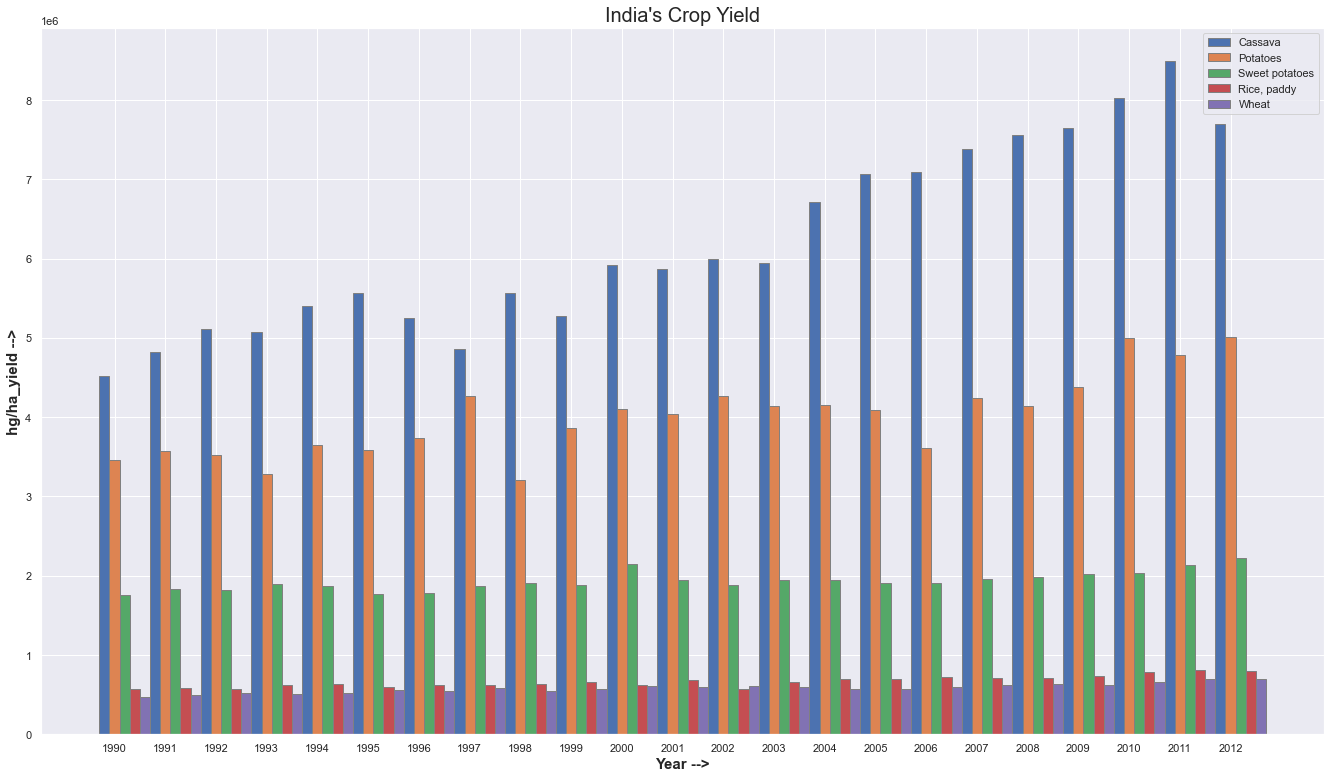

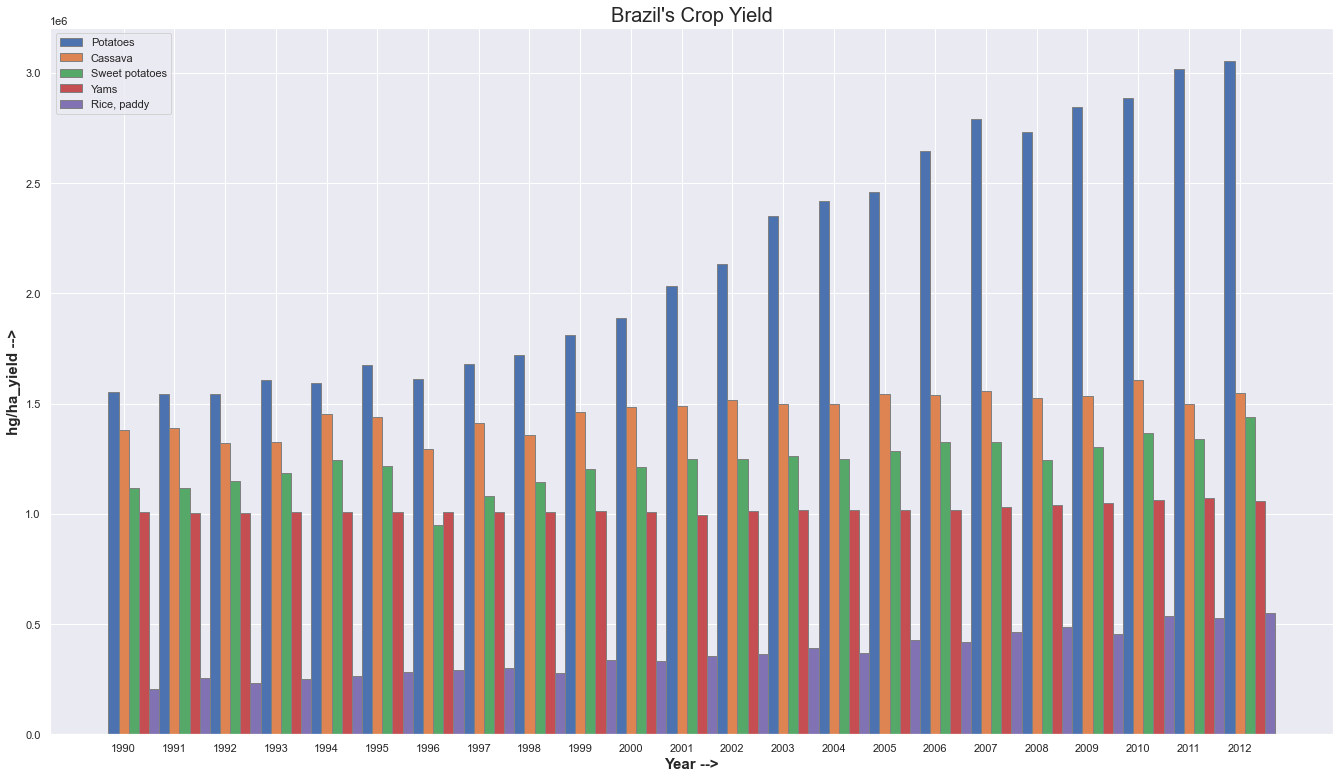

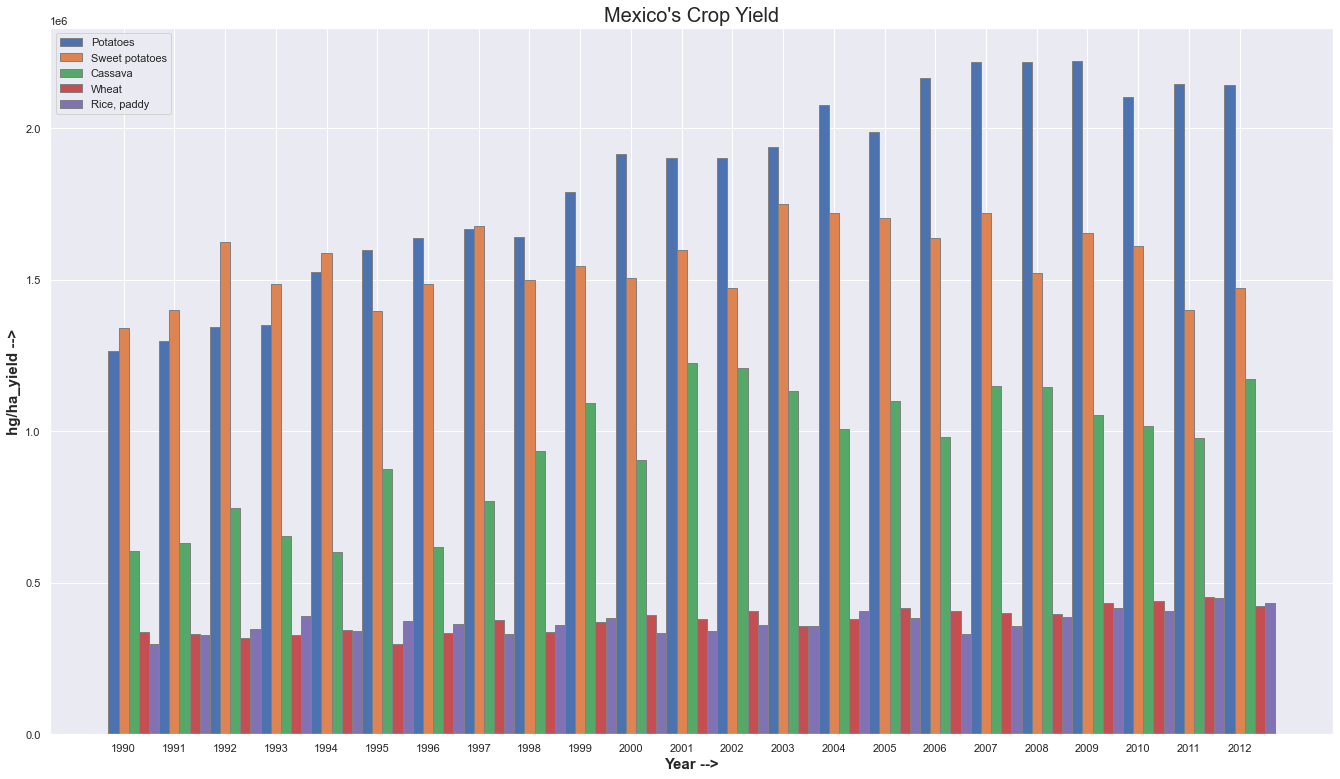

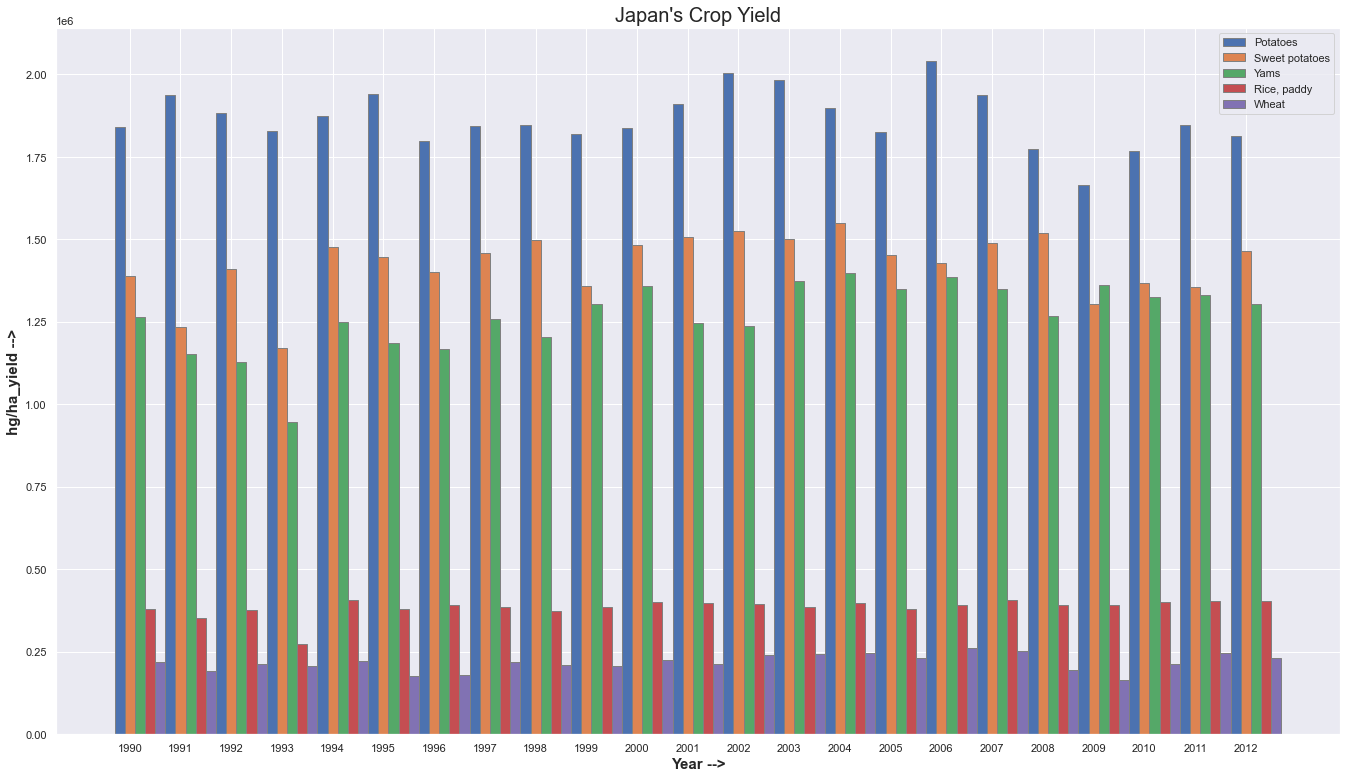

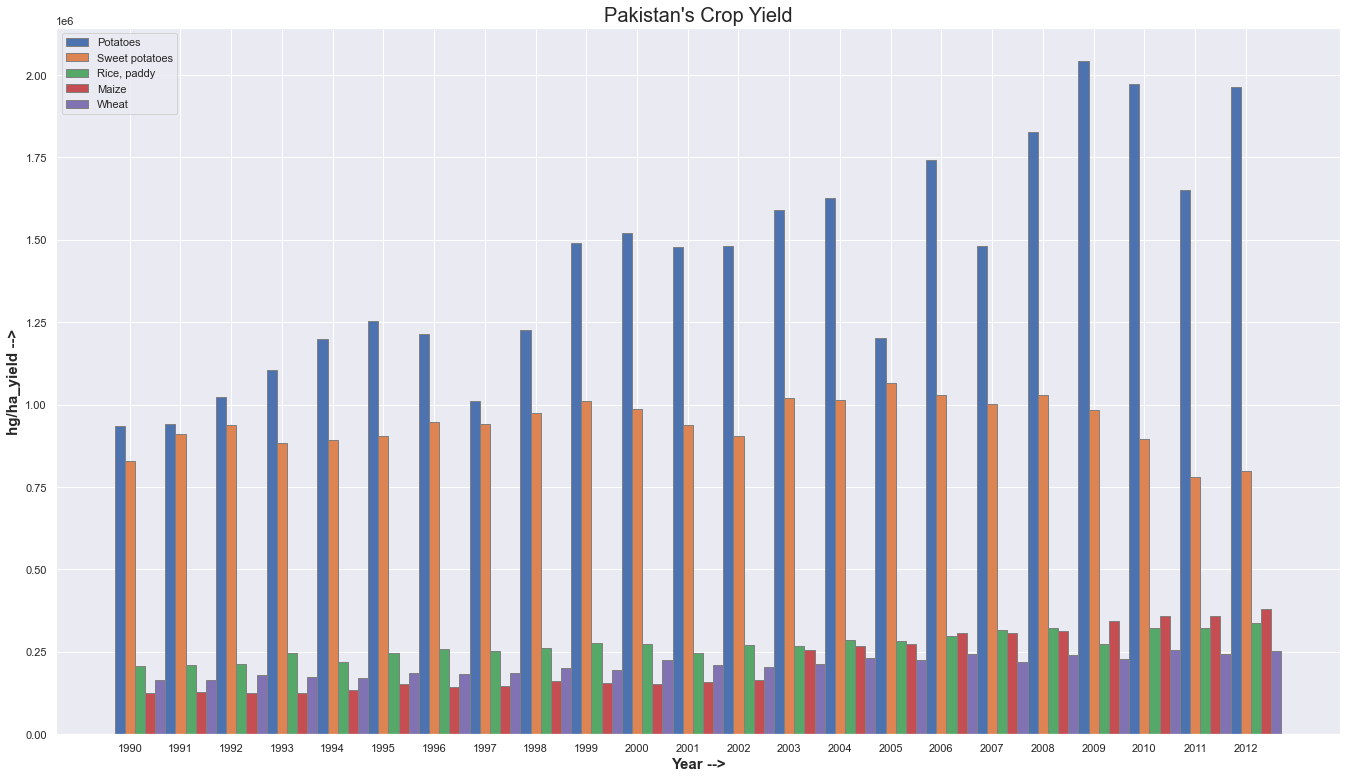

In [105]:
areas = ['India', 'Brazil', 'Mexico', 'Japan', 'Pakistan']
for area in areas:
          cgraph(area)

In [106]:
def CropGraph(item):
          test1 = yield_df.loc[(yield_df['Item'] == item)].groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(5)
          test1.to_csv('temp234.csv')
          test1 = pd.read_csv('temp234.csv')
          areas = test1['Area']
          plt.figure(figsize = (23,13))
          sns.set(style='darkgrid',)
          width = 0.2
          i=0
          for area in areas:
                    test1 = yield_df.loc[(yield_df['Area'] == area) & (yield_df['Item'] == item)].groupby(['Item','Year'],sort=True)['hg/ha_yield'].sum()
                    test1.to_csv('temp234.csv')
                    test1 = pd.read_csv('temp234.csv')
                    if(len(test1) != 0):
                              br1 = np.arange(len(test1)) + width*i
                              i = i + 1
                              plt.bar(br1, test1['hg/ha_yield'], width = width, edgecolor ='grey', label =area)
          plt.title(item+ "'s Crop Yield World-Wide", fontsize = 20)
          plt.xlabel('Year -->', fontweight ='bold', fontsize = 15)
          plt.ylabel('hg/ha_yield -->', fontweight ='bold', fontsize = 15)
          plt.xticks([r + width for r in range(len(test1))],
          ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012'])
          plt.legend()
          plt.show()

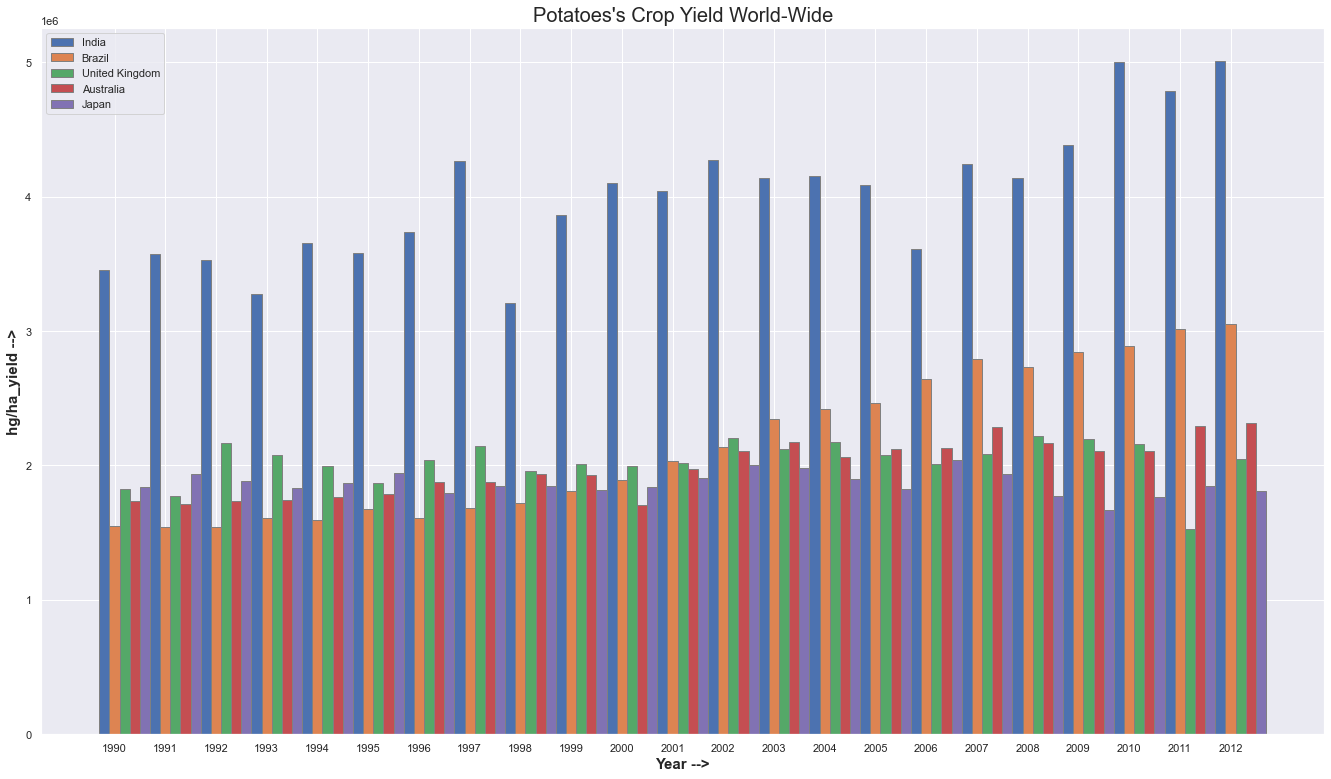

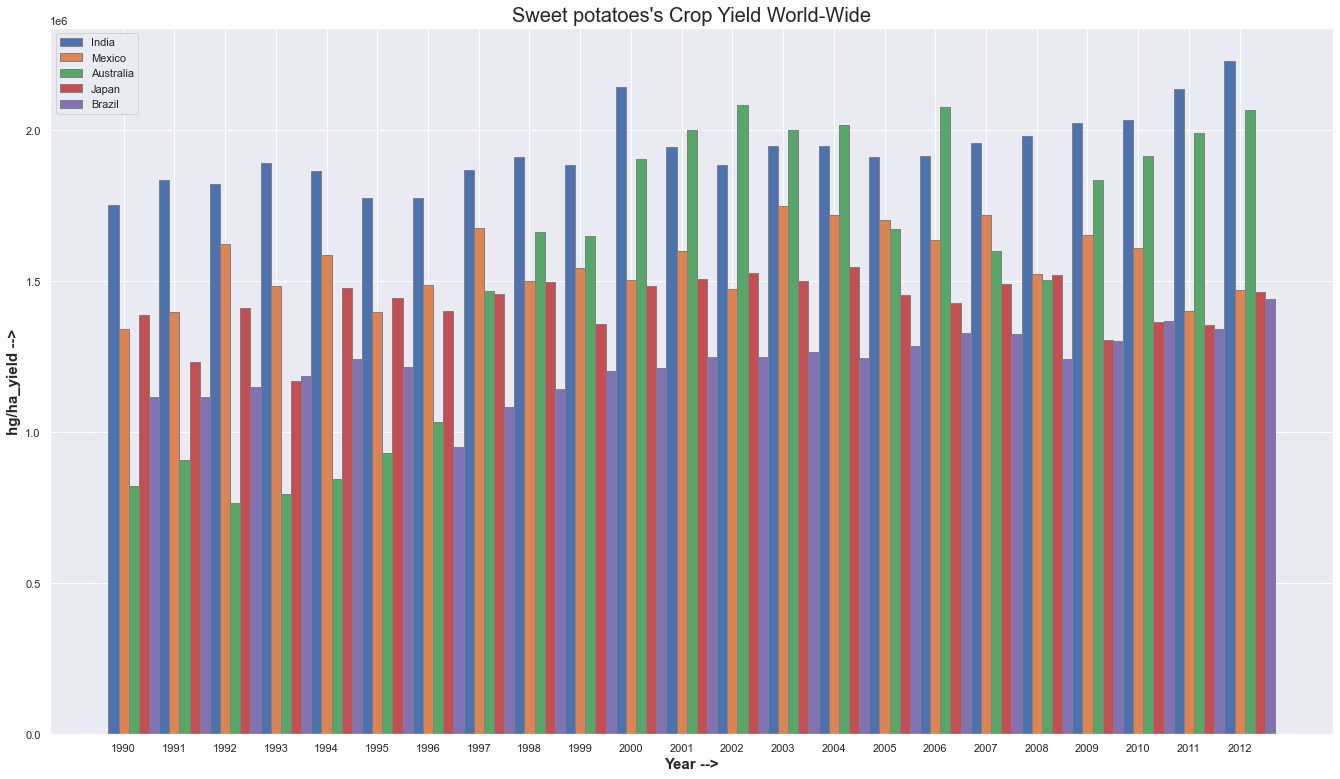

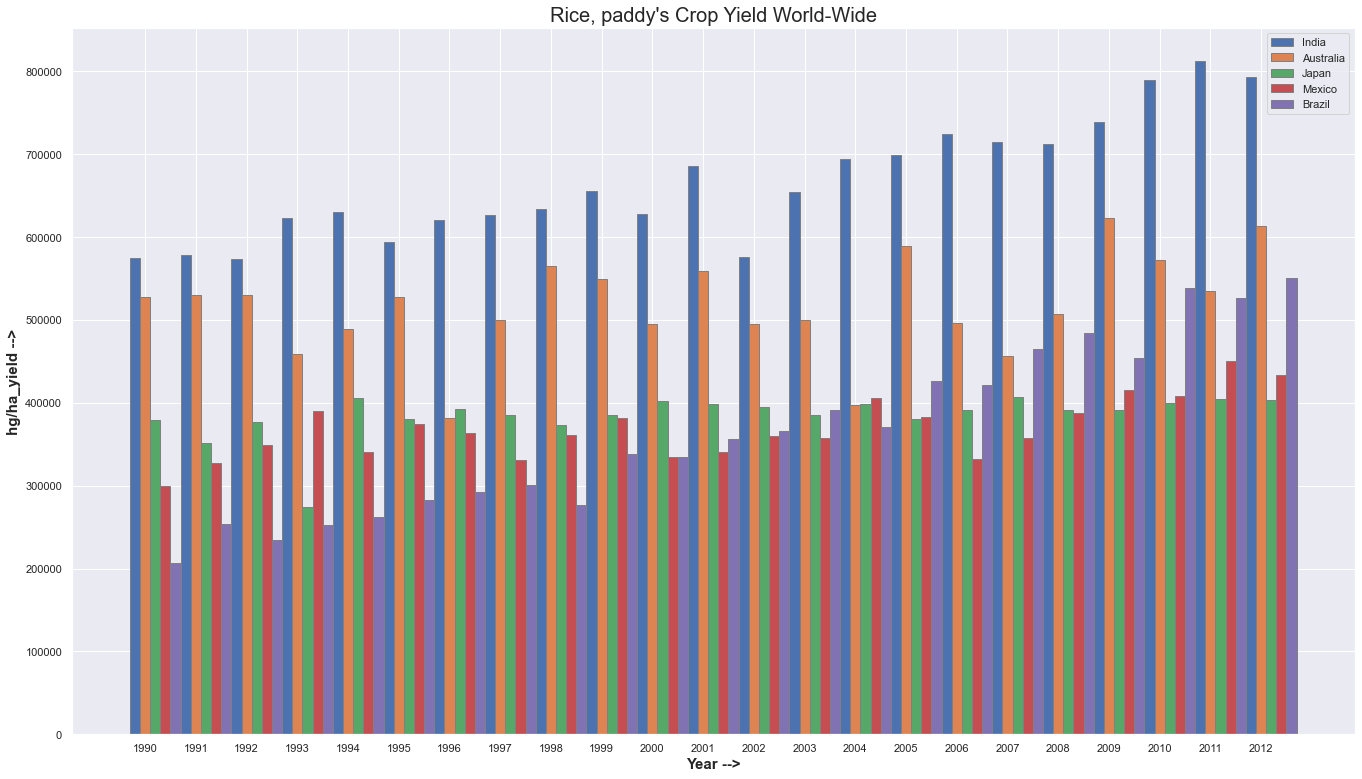

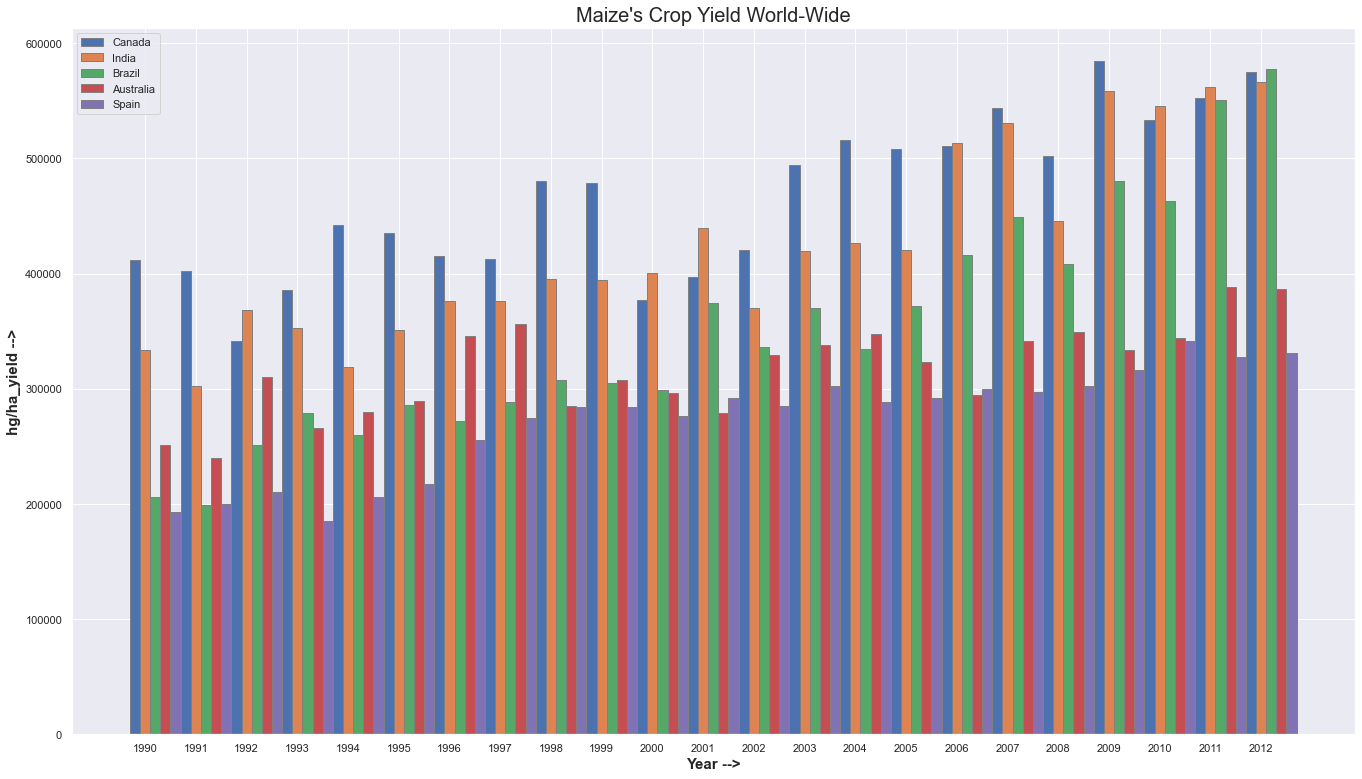

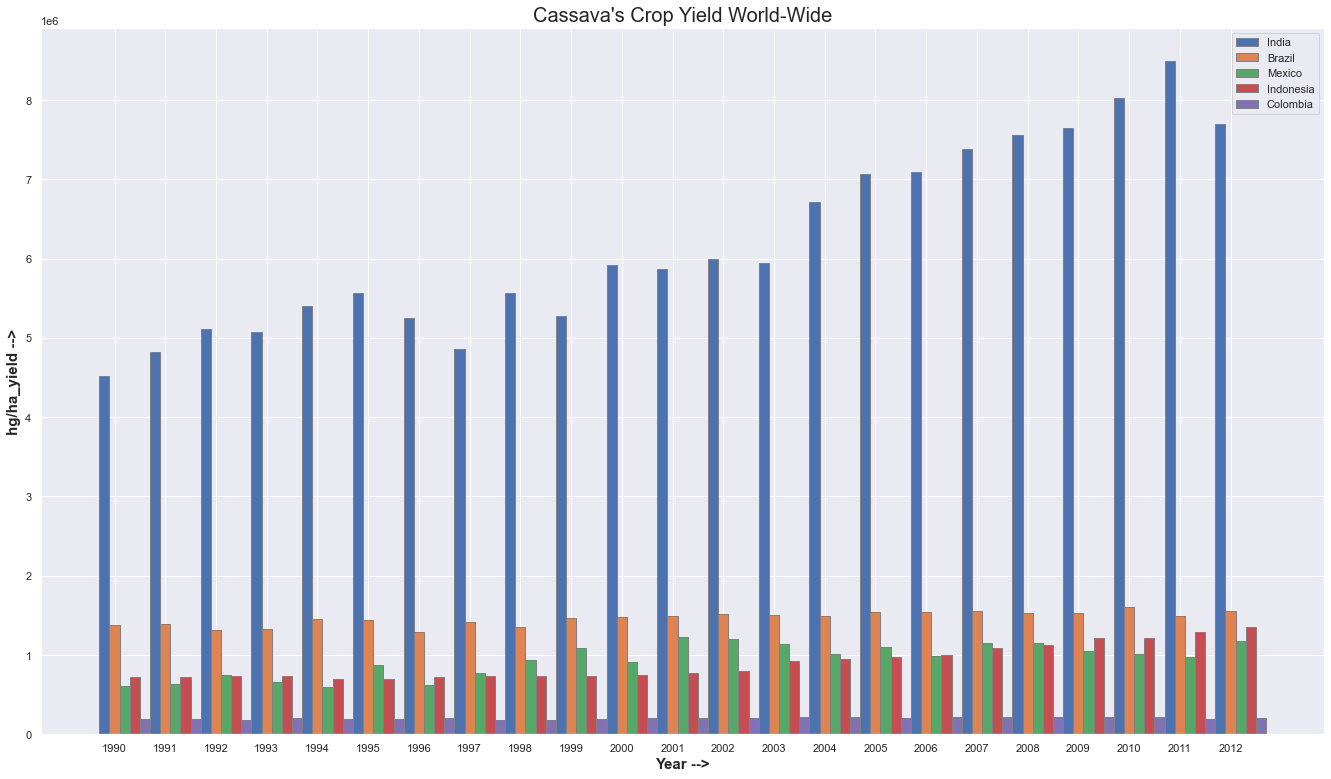

In [107]:
items = ['Potatoes', 'Sweet potatoes', 'Rice, paddy', 'Maize', 'Cassava']
for item in items:
          CropGraph(item)

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [108]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [109]:
yield_df.skew()

Year                             0.012243
hg/ha_yield                      1.793229
average_rain_fall_mm_per_year    0.853832
pesticides_tonnes                3.490289
avg_temp                        -0.741582
dtype: float64

<ipython-input-110-6dae81b7409e>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


<AxesSubplot:>

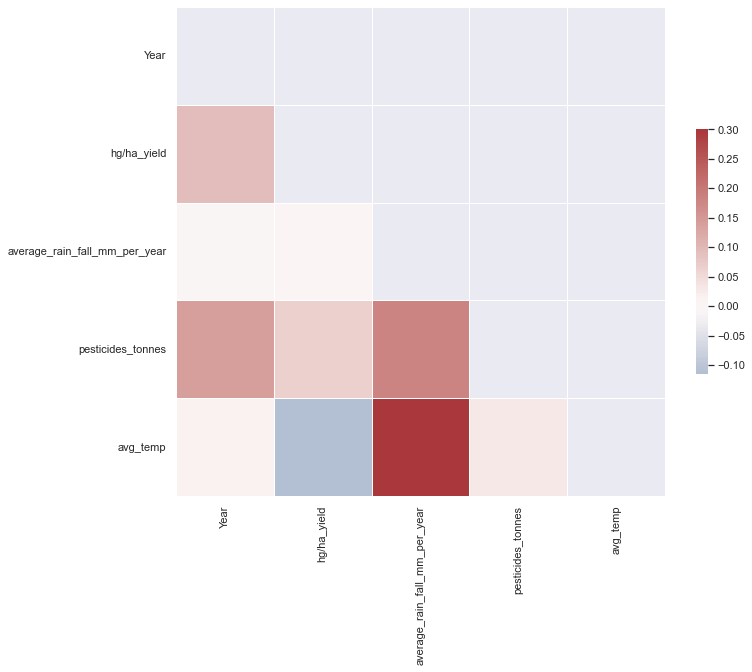

In [110]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe.

# Data Preprocessing
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

In [111]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. Label encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, Label Encoding will be used to convert these two columns to a numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will assign a numeric for each unique value in colums for each category and returns a matrix with the results.

In [112]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
yield_df['Item']= label_encoder.fit_transform(yield_df['Item'])

yield_df['Item'].unique()
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,1,1990,36613,1485.0,121.0,16.37
1,Albania,3,1990,66667,1485.0,121.0,16.37
2,Albania,4,1990,23333,1485.0,121.0,16.37
3,Albania,5,1990,12500,1485.0,121.0,16.37
4,Albania,6,1990,7000,1485.0,121.0,16.37


In [113]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
yield_df['Area']= label_encoder.fit_transform(yield_df['Area'])

yield_df['Area'].unique()
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37


In [114]:
features = yield_df
features = features.drop(['Year'], axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  int32  
 1   Item                           28242 non-null  int32  
 2   hg/ha_yield                    28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 1.3 MB


In [115]:
features.head()

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,36613,1485.0,121.0,16.37
1,0,3,66667,1485.0,121.0,16.37
2,0,4,23333,1485.0,121.0,16.37
3,0,5,12500,1485.0,121.0,16.37
4,0,6,7000,1485.0,121.0,16.37


### Scaling Features:
Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [117]:
features

array([[0.00000000e+00, 1.11111111e-01, 7.29273459e-02, 4.49670743e-01,
        3.28894097e-04, 5.13458262e-01],
       [0.00000000e+00, 3.33333333e-01, 1.32872057e-01, 4.49670743e-01,
        3.28894097e-04, 5.13458262e-01],
       [0.00000000e+00, 4.44444444e-01, 4.64394988e-02, 4.49670743e-01,
        3.28894097e-04, 5.13458262e-01],
       ...,
       [1.00000000e+00, 6.66666667e-01, 2.61128685e-02, 1.90028222e-01,
        6.93361288e-03, 6.28960818e-01],
       [1.00000000e+00, 7.77777778e-01, 4.42235351e-02, 1.90028222e-01,
        6.93361288e-03, 6.28960818e-01],
       [1.00000000e+00, 8.88888889e-01, 4.55519166e-02, 1.90028222e-01,
        6.93361288e-03, 6.28960818e-01]])

In [118]:
features

array([[0.00000000e+00, 1.11111111e-01, 7.29273459e-02, 4.49670743e-01,
        3.28894097e-04, 5.13458262e-01],
       [0.00000000e+00, 3.33333333e-01, 1.32872057e-01, 4.49670743e-01,
        3.28894097e-04, 5.13458262e-01],
       [0.00000000e+00, 4.44444444e-01, 4.64394988e-02, 4.49670743e-01,
        3.28894097e-04, 5.13458262e-01],
       ...,
       [1.00000000e+00, 6.66666667e-01, 2.61128685e-02, 1.90028222e-01,
        6.93361288e-03, 6.28960818e-01],
       [1.00000000e+00, 7.77777778e-01, 4.42235351e-02, 1.90028222e-01,
        6.93361288e-03, 6.28960818e-01],
       [1.00000000e+00, 8.88888889e-01, 4.55519166e-02, 1.90028222e-01,
        6.93361288e-03, 6.28960818e-01]])

### Training Data:
The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset)

In [119]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  int32  
 1   Item                           28242 non-null  int32  
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int32(2), int64(2)
memory usage: 1.5 MB


In [120]:
x = yield_df.loc[:,list(yield_df.columns[0:3]) + list(yield_df.columns[4:8])]
x

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,1485.0,121.00,16.37
1,0,3,1990,1485.0,121.00,16.37
2,0,4,1990,1485.0,121.00,16.37
3,0,5,1990,1485.0,121.00,16.37
4,0,6,1990,1485.0,121.00,16.37
...,...,...,...,...,...,...
28237,100,4,2013,657.0,2550.07,19.76
28238,100,5,2013,657.0,2550.07,19.76
28239,100,6,2013,657.0,2550.07,19.76
28240,100,7,2013,657.0,2550.07,19.76


In [121]:
y = yield_df["hg/ha_yield"]
y

0        36613
1        66667
2        23333
3        12500
4         7000
         ...  
28237    22581
28238     3066
28239    13142
28240    22222
28241    22888
Name: hg/ha_yield, Length: 28242, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model Comparison & Selection

In [123]:
from sklearn.metrics import r2_score
def compare_models(model):
          model_name = model.__class__.__name__
          fit=model.fit(X_train, y_train)
          y_pred=fit.predict(X_test)
          r2 = r2_score(y_test, y_pred)
          return ([model_name, r2])

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
from sklearn.linear_model import LinearRegression

models = [
          GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
          RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
          svm.SVR(),
          DecisionTreeRegressor(),
          xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123),
          LinearRegression(fit_intercept= True, normalize =True)
]

In [125]:
model_train=list(map(compare_models,models)) 

[17:58:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Simhadri Kushal\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [126]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8716255190872286]
['RandomForestRegressor', 0.6105610607772803]
['SVR', -0.2037907308609188]
['DecisionTreeRegressor', 0.9675228665885462]
['XGBRegressor', 0.9241520177534293]
['LinearRegression', 0.0864415812844056]


The evaluation metric is set based on <b>R^2 (coefficient of determination)</b>regression score function, that will represents the proportion of the variance for items (crops) in the regression model. <b>R^2</b> score shows how well terms (data points) fit a curve or line.

<b>R^2</b> is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance.

From results viewd above, <b>Decision Tree Regressor</b> has the highest R^2 score.

I'll also calculate Adjusted R^2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase. Adjusted R2 will always be less than or equal to R2.

In [127]:
test_df = pd.read_csv('yield_df.csv')

In [128]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model_name = model.__class__.__name__
fit=model.fit(X_train, y_train)
y_pred=fit.predict(x)
test_df["yield_predicted"]= pd.DataFrame(y_pred)
test_df["yield_actual"]=pd.DataFrame(y)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Cassava                 0.989299
Maize                   0.977521
Plantains and others    0.917088
Potatoes                0.973126
Rice, paddy             0.981522
Sorghum                 0.969833
Soybeans                0.965694
Sweet potatoes          0.972197
Wheat                   0.973667
Yams                    0.972067
dtype: float64

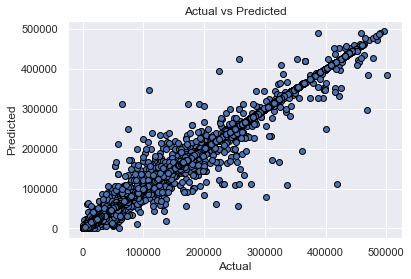

In [129]:
# So let's run the model actual values against the predicted ones 
fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

# Model Result & Conclusions

In [130]:
varimp= {'imp':model.feature_importances_,'names':yield_df.columns[yield_df.columns!="hg/ha_yield"]}

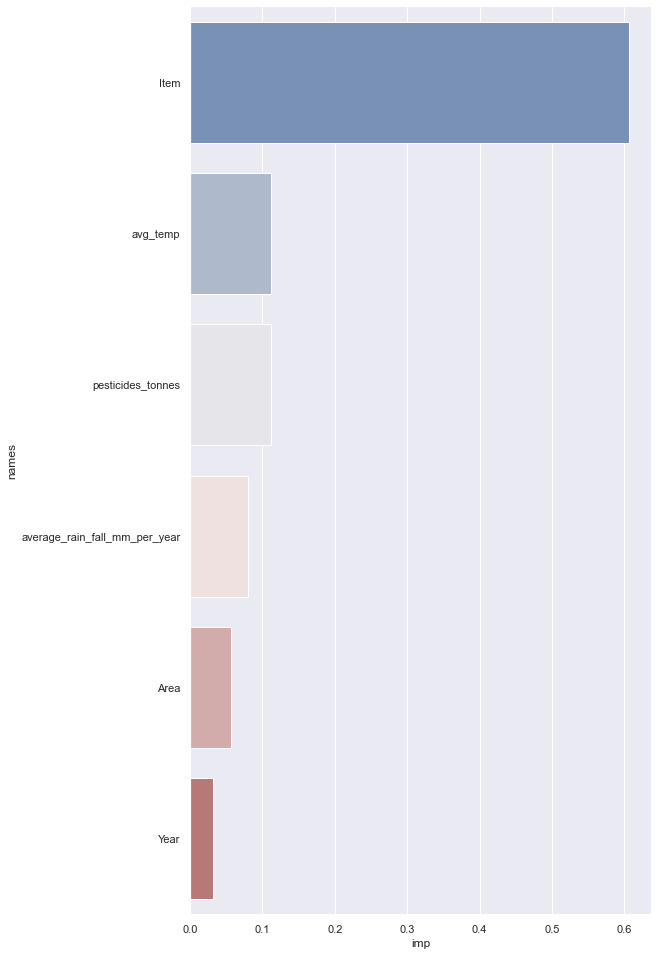

In [131]:
a4_dims = (8.27,16.7)
fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

Getting all features of importance in the model:

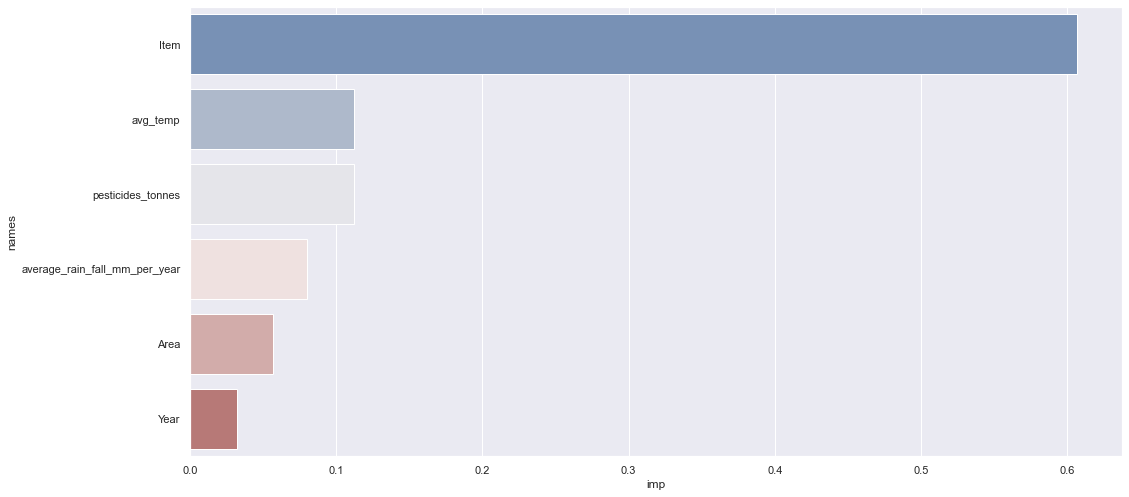

In [132]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(6,'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

The type of crop being predicted has the hisgest importance in decision making of the model.Then is the average temperatire in whict the crop is being produced followed by the amount of pesticides used are the second and third most important feature for the model.

India being the hishest crop producer makes sense since India has the largest crops sum in the dataset. Then comes rainfall and temprature. The first assumption about these features were correct, where they all significanally impact the expected crops yield in the model.

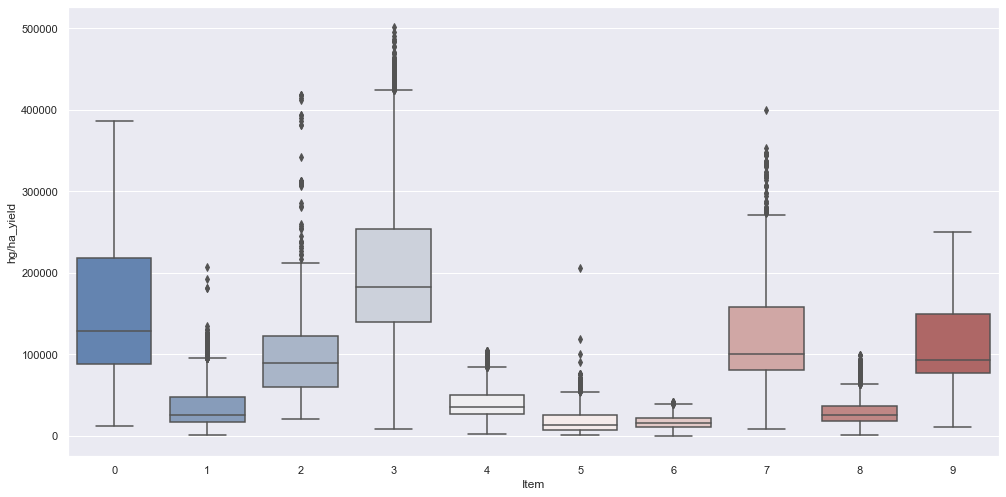

In [133]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);